In [1]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

In [16]:
sample_rate, samples = wavfile.read('BeeAudio1.wav')
print(samples)
resampled = resample(samples[:,0].astype(np.float32),sample_rate,8000)
print(resampled)

[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [ -965  -905]
 [-1083  -915]
 [-1327 -1140]]
[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634]


In [17]:
print(resampled,sample_rate)
samples_casted = resampled / (2.**15)
f, t, Zxx = signal.stft(samples_casted, fs = sample_rate, nperseg = 200, noverlap = 120, nfft = 256)
print(f,'\n', t,'\n',Zxx)
# frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate
Zxx_abs = np.abs(Zxx)
print(type(f), type(t), type(Zxx))

[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634] 32000
[    0.   125.   250.   375.   500.   625.   750.   875.  1000.  1125.
  1250.  1375.  1500.  1625.  1750.  1875.  2000.  2125.  2250.  2375.
  2500.  2625.  2750.  2875.  3000.  3125.  3250.  3375.  3500.  3625.
  3750.  3875.  4000.  4125.  4250.  4375.  4500.  4625.  4750.  4875.
  5000.  5125.  5250.  5375.  5500.  5625.  5750.  5875.  6000.  6125.
  6250.  6375.  6500.  6625.  6750.  6875.  7000.  7125.  7250.  7375.
  7500.  7625.  7750.  7875.  8000.  8125.  8250.  8375.  8500.  8625.
  8750.  8875.  9000.  9125.  9250.  9375.  9500.  9625.  9750.  9875.
 10000. 10125. 10250. 10375. 10500. 10625. 10750. 10875. 11000. 11125.
 11250. 11375. 11500. 11625. 11750. 11875. 12000. 12125. 12250. 12375.
 12500. 12625. 12750. 12875. 13000. 13125. 13250. 13375. 13500. 13625.
 13750. 13875. 14000. 14125. 14250. 14375. 14500. 14625. 14750. 14875.
 15000. 15125. 15250. 15375. 15500. 15625. 15750. 15875. 16000.] 
 [0.

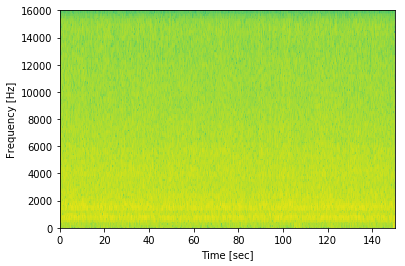

dtype('float32')

In [18]:
Zxx_log = np.log(Zxx_abs)
plt.pcolormesh(t, f, Zxx_log, vmin = Zxx_log.min(), vmax = Zxx_log.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
samples_casted.dtype

In [13]:
print(sample_shape)
print(samplePoints)
duration = samplePoints/sample_rate
print(duration)

(19200000, 2)
19200000.0
600.0


In [ ]:
from sklearn.decomposition import PCA
